这个文档使用来分析TIMs作为变温环境下储层计算可靠性的评估指标是否可行。

### 库


In [1]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from Plotting import plot_style_config
from Plotting import ParetoFront_Plotting
from Analysis.analysis_TIMs_with_temperatures import analysis_TIMs_with_temperatures
from Analysis.assisted_functions import load_data
from Analysis.assisted_functions import analyze_correlations
from Analysis.assisted_plotting import plot_scatter
from Analysis.assisted_plotting import plot_bar

'''
NARMA10' result columns:['temp', 'MSE', 'NRMSE', 'y_test', 'pred']
'''

"\nNARMA10' result columns:['temp', 'MSE', 'NRMSE', 'y_test', 'pred']\n"

### 数据提取

In [21]:
# 提取数据
MC_data = load_data("../random_points_TIMs_hetero", "result_MC_heterogeneous", ['temp', 'MC'])
CQ_data = load_data("../random_points_TIMs_hetero", "result_KRandGR_heterogeneous", ['temp', 'CQ'])
KR_data = load_data("../random_points_TIMs_hetero", "result_KRandGR_heterogeneous", ['temp', 'KR'])
GR_data = load_data("../random_points_TIMs_hetero", "result_KRandGR_heterogeneous", ['temp', 'GR'])
NARMA10_data = load_data("../random_points_TIMs_hetero", "result_NARMA10_heterogeneous", ['temp', 'NRMSE'])

#以number为key
labels = MC_data['number'].unique()

# 把NARMA10_data中的number转换为int
NARMA10_data['number'] = NARMA10_data['number'].astype(int)

# 创建字典，来存储每个number的分析结果
MC_results = {}
CQ_results = {}
KR_results = {}
GR_results = {}
NARMA10_results = {}

for label in labels:

    subset_MC = MC_data[MC_data['number'] == label].sort_values('temp') # 按temp排序
    subset_CQ = CQ_data[CQ_data['number'] == label].sort_values('temp')
    subset_KR = KR_data[KR_data['number'] == label].sort_values('temp')
    subset_GR = GR_data[GR_data['number'] == label].sort_values('temp')
    subset_NARMA10 = NARMA10_data[NARMA10_data['number'] == label].sort_values('temp')


    MC_analysis = analysis_TIMs_with_temperatures(subset_MC['MC']) # 使用辅助函数
    CQ_analysis = analysis_TIMs_with_temperatures(subset_CQ['CQ'])
    KR_analysis = analysis_TIMs_with_temperatures(subset_KR['KR'])
    GR_analysis = analysis_TIMs_with_temperatures(subset_GR['GR'])
    NARMA10_analysis = analysis_TIMs_with_temperatures(subset_NARMA10['NRMSE'])

    MC_results[label] = MC_analysis
    CQ_results[label] = CQ_analysis
    KR_results[label] = KR_analysis
    GR_results[label] = GR_analysis
    NARMA10_results[label] = NARMA10_analysis

# 结果转换为DF
MC_results = pd.DataFrame(MC_results).T
CQ_results = pd.DataFrame(CQ_results).T
KR_results = pd.DataFrame(KR_results).T
GR_results = pd.DataFrame(GR_results).T
NARMA10_results = pd.DataFrame(NARMA10_results).T

# 保存为csv文件
NARMA10_results.to_csv('NARMA10_results_random_200.csv', index=False)
MC_results.to_csv('MC_results_random_200.csv', index=False)
CQ_results.to_csv('CQ_results_random_200.csv', index=False)
KR_results.to_csv('KR_results_random_200.csv', index=False)
GR_results.to_csv('GR_results_random_200.csv', index=False)

找到 138 个文件，开始处理...
找到 138 个文件，开始处理...
找到 138 个文件，开始处理...
找到 138 个文件，开始处理...
找到 138 个文件，开始处理...


### 调查：每一个独立的MC指标特征与任务表现之间的相关性. 两种方式：plot and pearson(spearman) cofficient

#### 任务表现指标：CV_nrmse

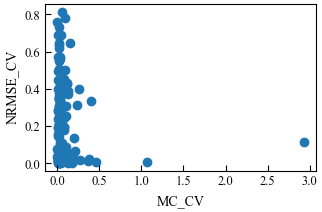

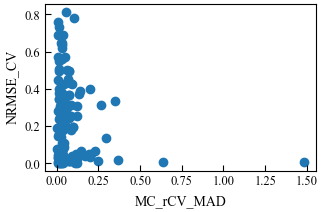

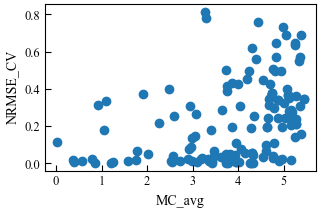

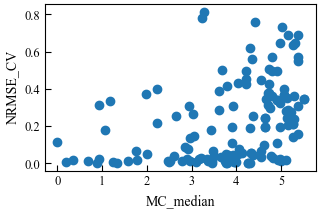

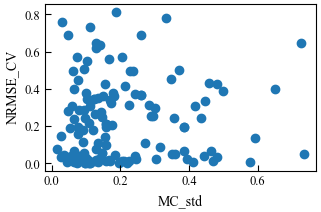

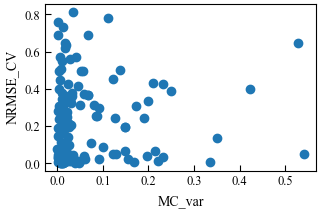

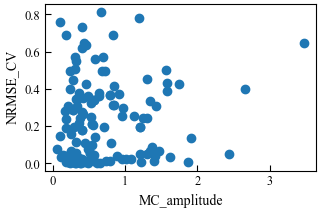

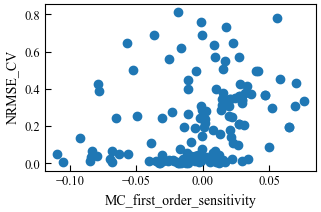

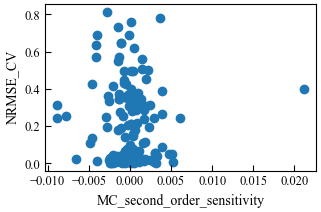

特征与 CV 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.1028       0.2303   -0.0505       0.5562
rCV_MAD                   -0.1476       0.0852   -0.0414       0.6310
avg                        0.3903 ***   0.0000    0.4596 ***   0.0000
median                     0.3893 ***   0.0000    0.4636 ***   0.0000
std                        0.0726       0.3974    0.1462       0.0870
var                        0.0567       0.5091    0.1462       0.0870
amplitude                  0.1125       0.1890    0.1474       0.0844
first_order_sensitivity    0.2889 ***   0.0006    0.3858 ***   0.0000
second_order_sensitivity  -0.0329       0.7020   -0.0217       0.8008
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [4]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'CV'

for feature in feature_list:
    plot_scatter(MC_results[feature], NARMA10_results['CV'], f'MC_{feature}', 'NRMSE_CV')

analyze_correlations(MC_results, NARMA10_results, target_metric='CV', features=feature_list, plot=False)

#### 任务表现指标：rCV_MAD


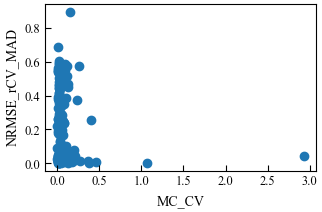

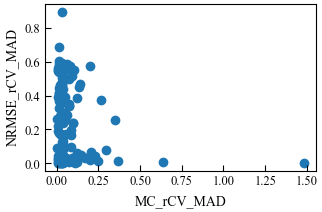

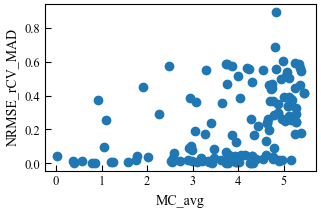

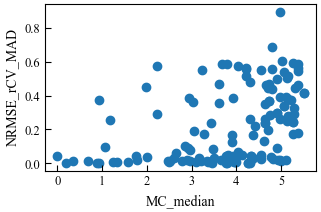

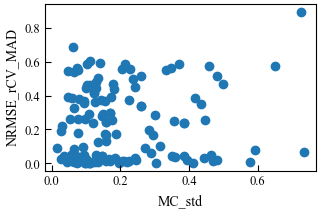

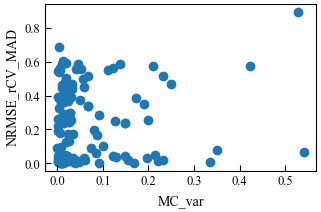

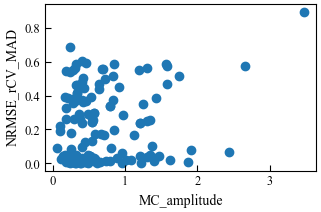

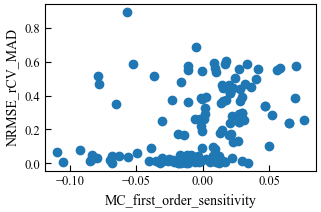

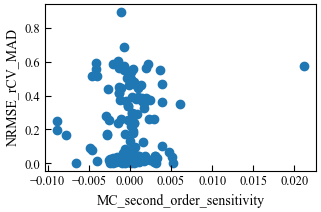

特征与 rCV_MAD 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.1244       0.1461   -0.0832       0.3317
rCV_MAD                   -0.1562       0.0684   -0.0707       0.4117
avg                        0.4266 ***   0.0000    0.4897 ***   0.0000
median                     0.4250 ***   0.0000    0.4927 ***   0.0000
std                        0.1288       0.1323    0.1267       0.1386
var                        0.1371       0.1087    0.1267       0.1386
amplitude                  0.1872 *     0.0279    0.1245       0.1456
first_order_sensitivity    0.3224 ***   0.0001    0.4002 ***   0.0000
second_order_sensitivity   0.0609       0.4781    0.0208       0.8090
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [5]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'rCV_MAD'

for feature in feature_list:
    plot_scatter(MC_results[feature], NARMA10_results[target], f'MC_{feature}', f'NRMSE_{target}')

analyze_correlations(MC_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：std

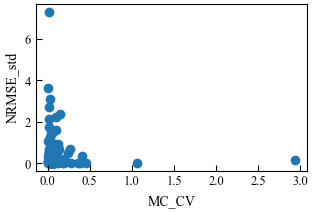

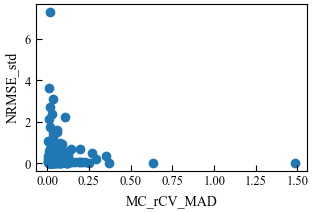

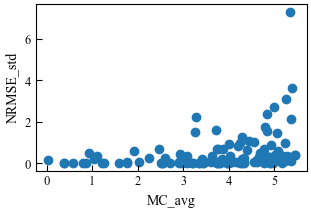

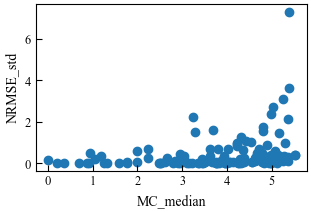

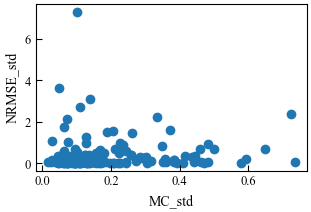

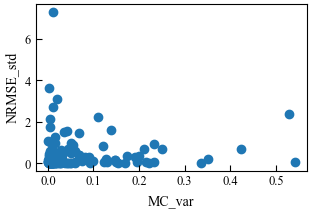

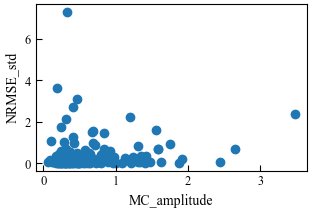

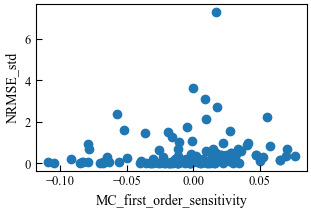

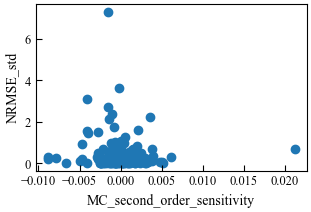

特征与 std 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.0672       0.4337   -0.0429       0.6172
rCV_MAD                   -0.1043       0.2254   -0.0426       0.6208
avg                        0.2694 **    0.0014    0.4253 ***   0.0000
median                     0.2705 **    0.0013    0.4290 ***   0.0000
std                        0.0068       0.9369    0.1356       0.1129
var                        0.0313       0.7159    0.1356       0.1129
amplitude                  0.0527       0.5390    0.1399       0.1017
first_order_sensitivity    0.1135       0.1849    0.3564 ***   0.0000
second_order_sensitivity  -0.0672       0.4336   -0.0121       0.8881
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [6]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'std'

for feature in feature_list:
    plot_scatter(MC_results[feature], NARMA10_results[target], f'MC_{feature}', f'NRMSE_{target}')

analyze_correlations(MC_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：avg

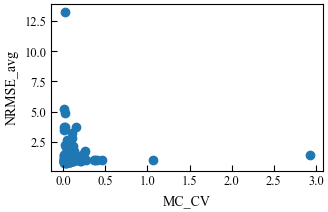

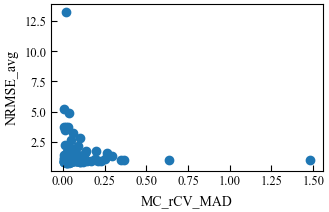

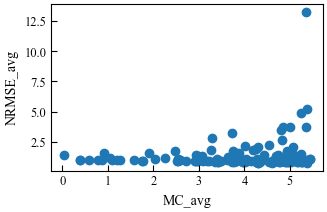

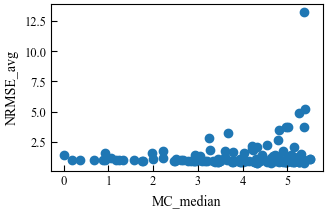

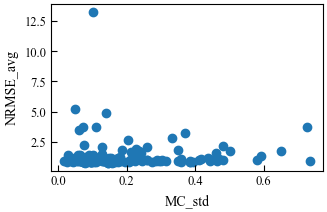

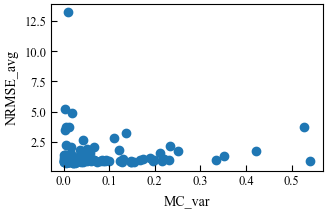

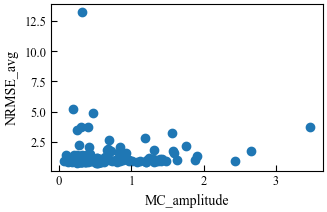

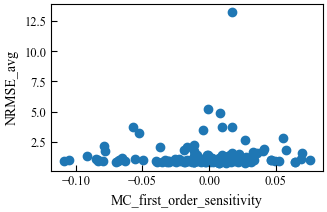

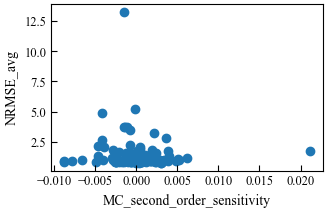

特征与 avg 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.0188       0.8265    0.1368       0.1097
rCV_MAD                   -0.0634       0.4615    0.0759       0.3783
avg                        0.1747 *     0.0404   -0.0022       0.9800
median                     0.1757 *     0.0392   -0.0017       0.9838
std                        0.0031       0.9714    0.1113       0.1938
var                        0.0339       0.6927    0.1113       0.1938
amplitude                  0.0433       0.6141    0.1240       0.1474
first_order_sensitivity    0.0450       0.6005    0.0838       0.3284
second_order_sensitivity  -0.0516       0.5477    0.0159       0.8533
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [7]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'avg'

for feature in feature_list:
    plot_scatter(MC_results[feature], NARMA10_results[target], f'MC_{feature}', f'NRMSE_{target}')

analyze_correlations(MC_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

### 调查：每一个独立的CQ指标特征与任务表现之间的相关性. 两种方式：plot and pearson(spearman) cofficient

#### 任务表现指标：CV

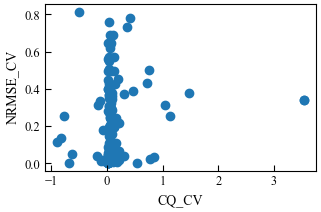

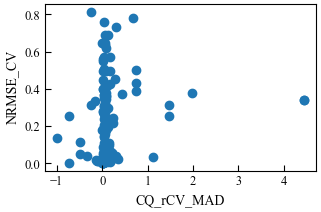

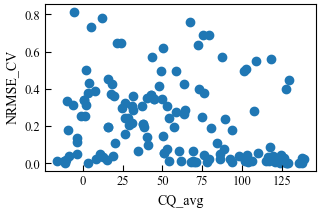

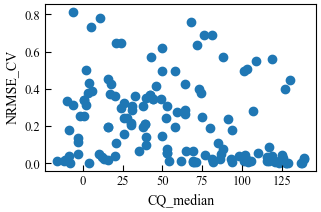

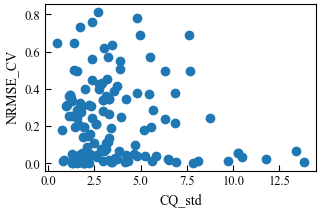

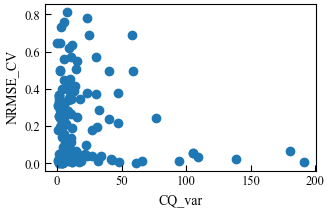

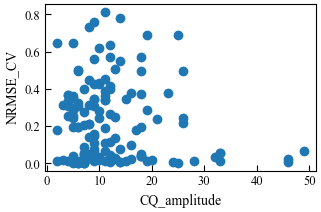

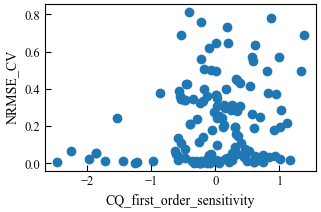

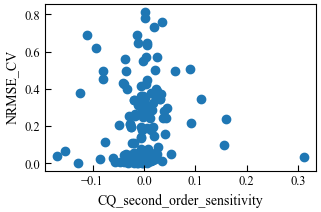

特征与 CV 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.1195       0.1627    0.2742 **    0.0011
rCV_MAD                    0.1483       0.0826    0.2997 ***   0.0004
avg                       -0.2589 **    0.0022   -0.3070 ***   0.0003
median                    -0.2640 **    0.0018   -0.3117 ***   0.0002
std                       -0.1153       0.1783   -0.0221       0.7966
var                       -0.1547       0.0700   -0.0225       0.7933
amplitude                 -0.1153       0.1782   -0.0087       0.9196
first_order_sensitivity    0.1904 *     0.0253    0.1253       0.1430
second_order_sensitivity   0.0375       0.6622    0.1715 *     0.0442
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [8]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'CV'

for feature in feature_list:
    plot_scatter(CQ_results[feature], NARMA10_results[target], f'CQ_{feature}', f'NRMSE_{target}')

analyze_correlations(CQ_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：rCV_MAD

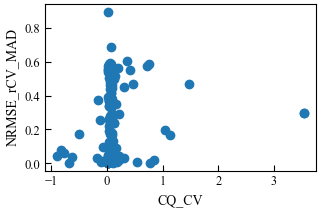

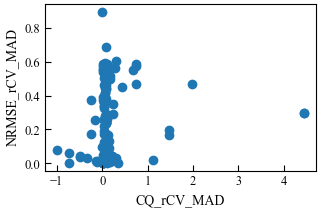

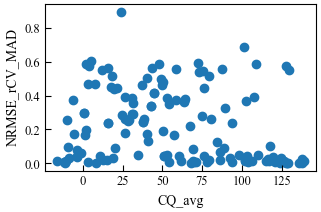

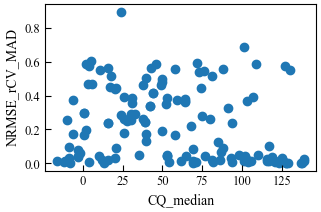

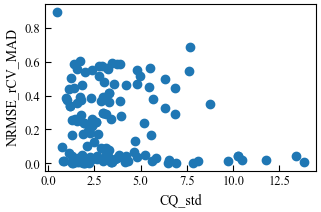

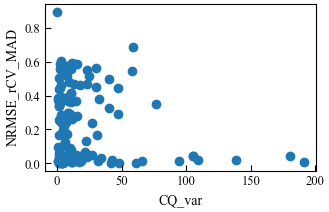

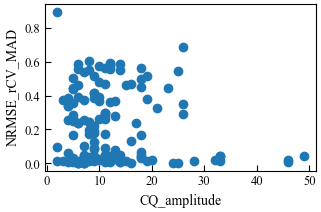

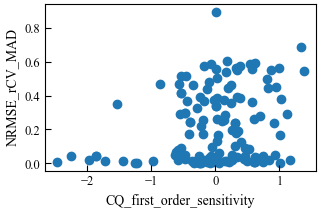

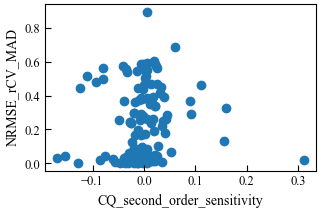

特征与 rCV_MAD 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.1453       0.0891    0.3178 ***   0.0001
rCV_MAD                    0.1508       0.0774    0.3354 ***   0.0001
avg                       -0.2287 **    0.0070   -0.2666 **    0.0016
median                    -0.2351 **    0.0055   -0.2724 **    0.0012
std                       -0.1023       0.2324    0.0022       0.9793
var                       -0.1432       0.0938    0.0019       0.9825
amplitude                 -0.1101       0.1987    0.0079       0.9270
first_order_sensitivity    0.2384 **    0.0049    0.1811 *     0.0335
second_order_sensitivity   0.0932       0.2768    0.2295 **    0.0068
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [9]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'rCV_MAD'

for feature in feature_list:
    plot_scatter(CQ_results[feature], NARMA10_results[target], f'CQ_{feature}', f'NRMSE_{target}')

analyze_correlations(CQ_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：std

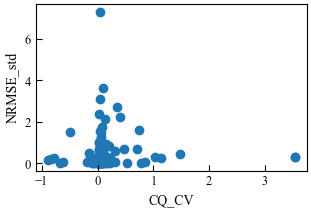

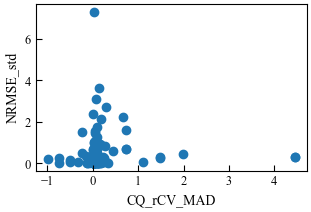

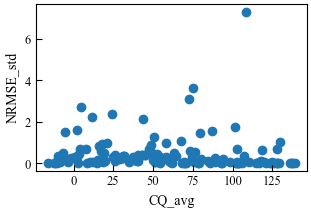

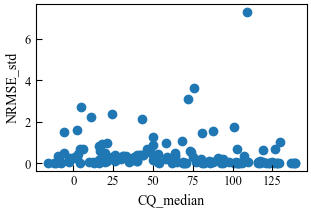

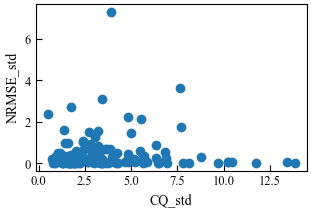

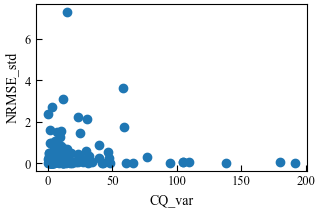

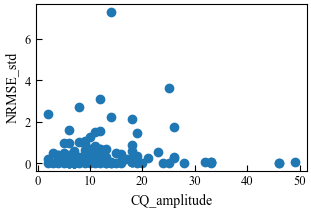

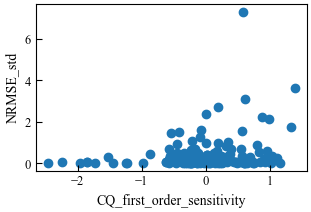

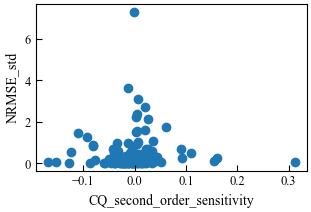

特征与 std 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.0186       0.8285    0.2569 **    0.0024
rCV_MAD                    0.0258       0.7637    0.2828 ***   0.0008
avg                       -0.0313       0.7152   -0.2995 ***   0.0004
median                    -0.0336       0.6956   -0.3045 ***   0.0003
std                        0.0093       0.9136   -0.0107       0.9013
var                       -0.0353       0.6809   -0.0110       0.8981
amplitude                  0.0137       0.8733    0.0046       0.9576
first_order_sensitivity    0.2316 **    0.0063    0.1569       0.0661
second_order_sensitivity   0.0208       0.8090    0.1905 *     0.0252
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [10]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'std'

for feature in feature_list:
    plot_scatter(CQ_results[feature], NARMA10_results[target], f'CQ_{feature}', f'NRMSE_{target}')

analyze_correlations(CQ_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：avg

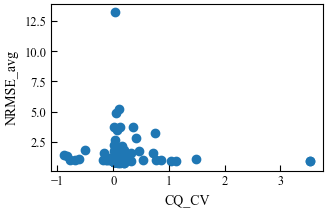

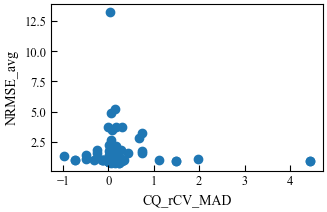

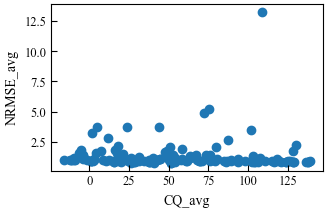

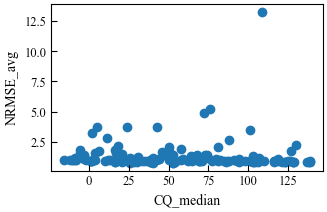

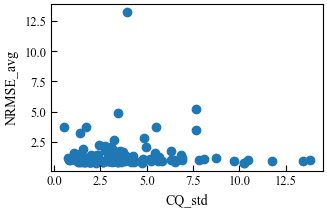

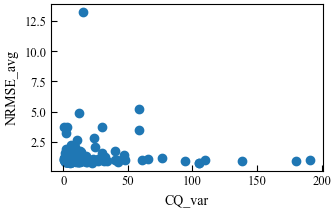

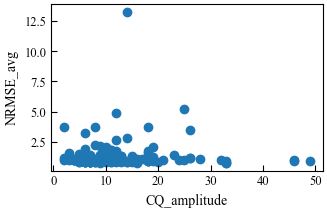

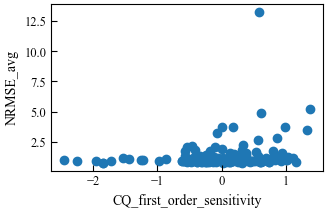

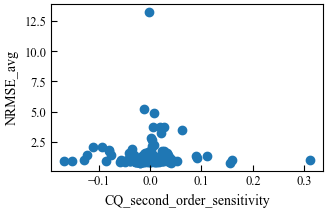

特征与 avg 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.0178       0.8356    0.0999       0.2437
rCV_MAD                   -0.0173       0.8401    0.1060       0.2160
avg                        0.0206       0.8107   -0.2556 **    0.0025
median                     0.0191       0.8237   -0.2593 **    0.0021
std                        0.0402       0.6399    0.0900       0.2941
var                       -0.0022       0.9793    0.0898       0.2949
amplitude                  0.0450       0.6001    0.1063       0.2148
first_order_sensitivity    0.2160 *     0.0110    0.1381       0.1062
second_order_sensitivity   0.0181       0.8328    0.1369       0.1093
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [11]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'avg'

for feature in feature_list:
    plot_scatter(CQ_results[feature], NARMA10_results[target], f'CQ_{feature}', f'NRMSE_{target}')

analyze_correlations(CQ_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

### 调查：每一个独立的KR指标特征与任务表现之间的相关性. 两种方式：plot and pearson(spearman) cofficient

#### 任务表现指标：CV

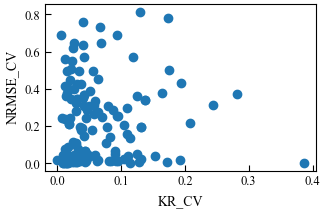

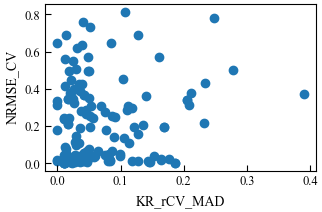

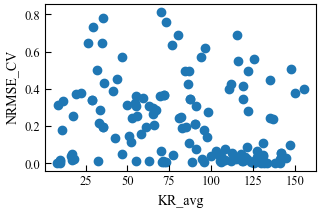

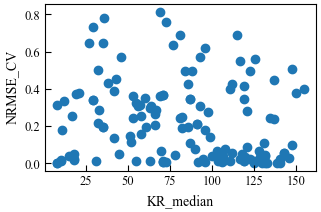

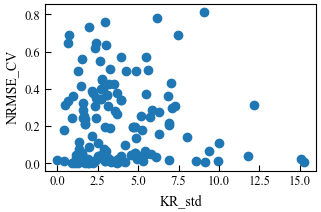

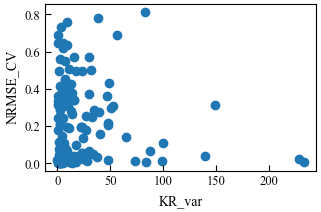

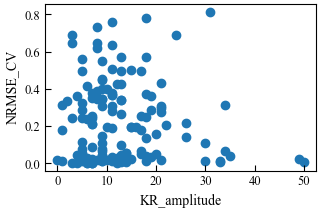

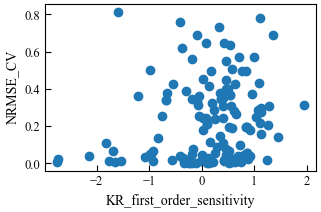

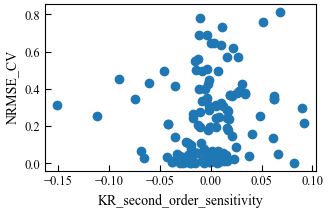

特征与 CV 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.0597       0.4866    0.1077       0.2086
rCV_MAD                    0.1078       0.2081    0.0970       0.2579
avg                       -0.1939 *     0.0227   -0.2127 *     0.0122
median                    -0.1940 *     0.0226   -0.2139 *     0.0118
std                       -0.0503       0.5578    0.0360       0.6752
var                       -0.0889       0.2999    0.0360       0.6752
amplitude                 -0.0568       0.5079    0.0377       0.6609
first_order_sensitivity    0.1740 *     0.0412    0.1839 *     0.0308
second_order_sensitivity   0.1565       0.0668    0.2350 **    0.0055
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [12]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'CV'

for feature in feature_list:
    plot_scatter(KR_results[feature], NARMA10_results[target], f'KR_{feature}', f'NRMSE_{target}')

analyze_correlations(KR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：rCV_MAD

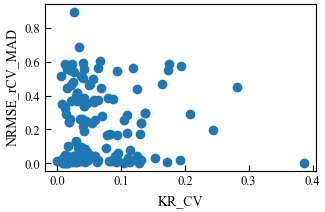

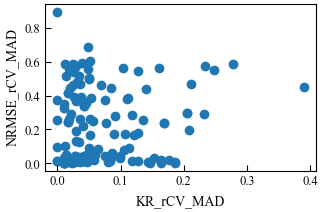

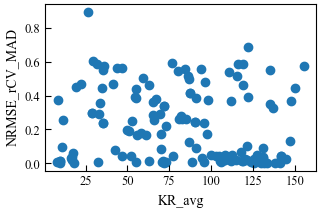

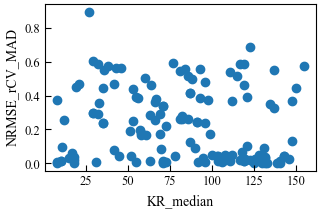

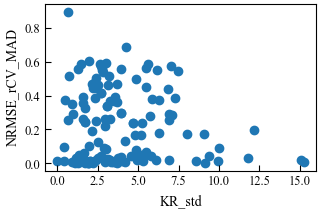

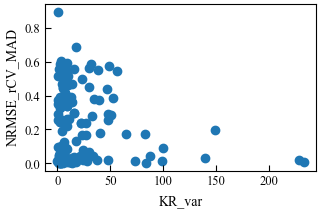

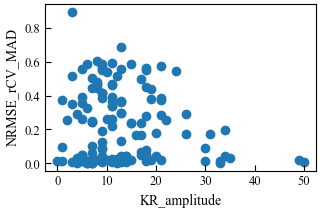

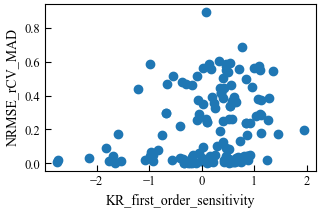

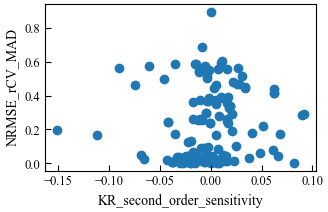

特征与 rCV_MAD 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.0256       0.7652    0.0959       0.2632
rCV_MAD                    0.0981       0.2522    0.0911       0.2878
avg                       -0.1695 *     0.0469   -0.1870 *     0.0281
median                    -0.1694 *     0.0470   -0.1888 *     0.0266
std                       -0.0927       0.2798    0.0544       0.5261
var                       -0.1393       0.1032    0.0544       0.5261
amplitude                 -0.1062       0.2153    0.0528       0.5387
first_order_sensitivity    0.2692 **    0.0014    0.2647 **    0.0017
second_order_sensitivity   0.1023       0.2325    0.2058 *     0.0155
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [13]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'rCV_MAD'

for feature in feature_list:
    plot_scatter(KR_results[feature], NARMA10_results[target], f'KR_{feature}', f'NRMSE_{target}')

analyze_correlations(KR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：std

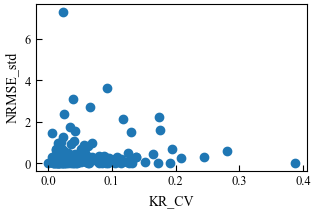

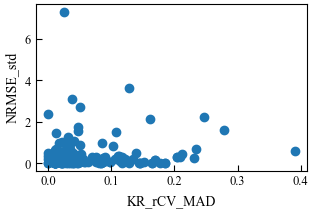

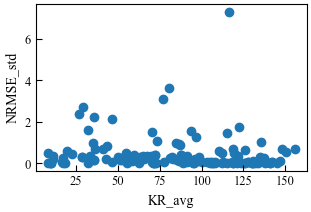

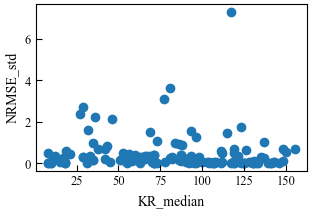

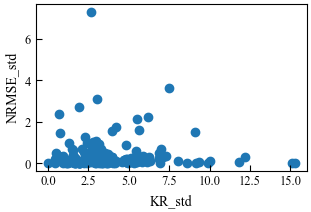

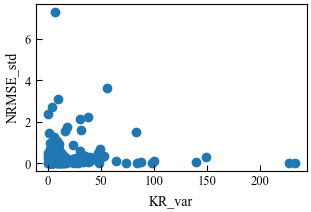

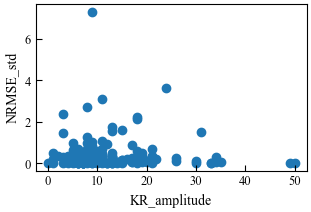

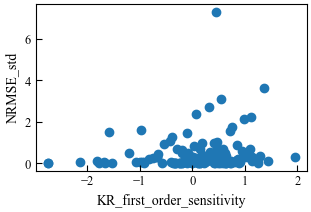

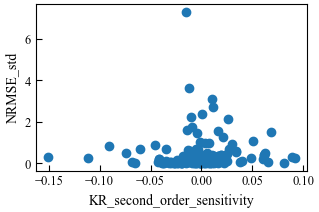

特征与 std 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.0058       0.9460    0.1060       0.2160
rCV_MAD                    0.0430       0.6167    0.0865       0.3132
avg                       -0.0679       0.4286   -0.2189 **    0.0099
median                    -0.0669       0.4355   -0.2203 **    0.0094
std                       -0.0283       0.7420    0.0257       0.7645
var                       -0.0535       0.5329    0.0257       0.7645
amplitude                 -0.0291       0.7345    0.0278       0.7460
first_order_sensitivity    0.1349       0.1145    0.1834 *     0.0313
second_order_sensitivity   0.0508       0.5542    0.2367 **    0.0052
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [14]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'std'

for feature in feature_list:
    plot_scatter(KR_results[feature], NARMA10_results[target], f'KR_{feature}', f'NRMSE_{target}')

analyze_correlations(KR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：avg

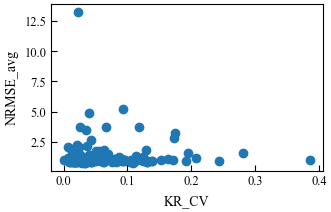

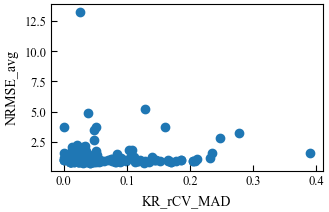

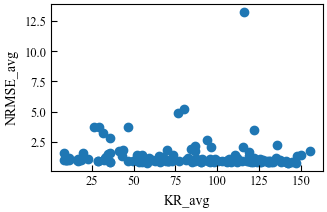

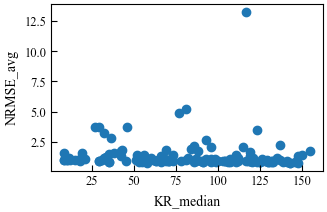

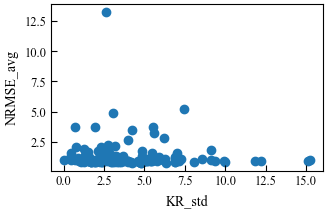

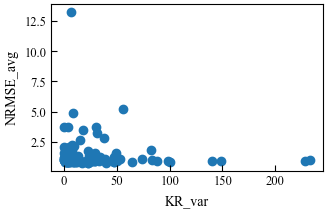

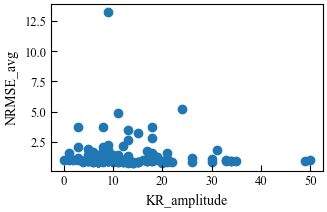

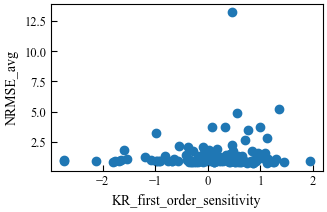

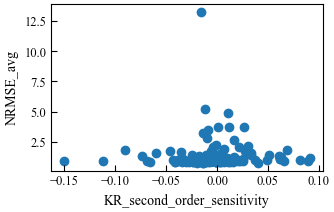

特征与 avg 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.0062       0.9421    0.1288       0.1322
rCV_MAD                    0.0217       0.8001    0.0784       0.3606
avg                       -0.0379       0.6588   -0.3065 ***   0.0003
median                    -0.0368       0.6682   -0.3072 ***   0.0002
std                       -0.0335       0.6966   -0.0719       0.4023
var                       -0.0491       0.5672   -0.0719       0.4023
amplitude                 -0.0327       0.7033   -0.0697       0.4167
first_order_sensitivity    0.0976       0.2548   -0.0335       0.6964
second_order_sensitivity   0.0214       0.8035    0.2568 **    0.0024
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [15]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'avg'

for feature in feature_list:
    plot_scatter(KR_results[feature], NARMA10_results[target], f'KR_{feature}', f'NRMSE_{target}')

analyze_correlations(KR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

### 调查：每一个独立的GR指标特征与任务表现之间的相关性. 两种方式：plot and pearson(spearman) cofficient

#### 任务表现指标：CV

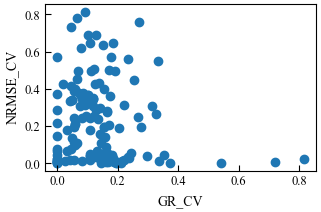

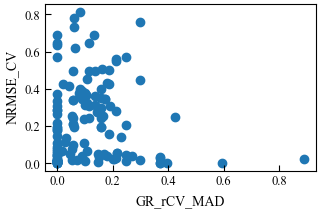

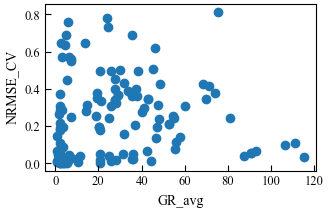

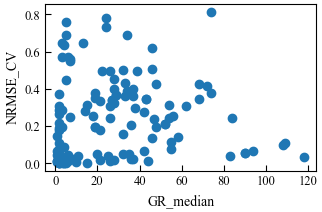

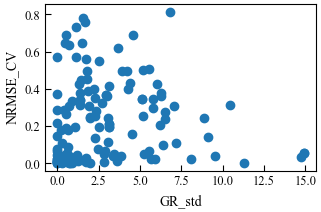

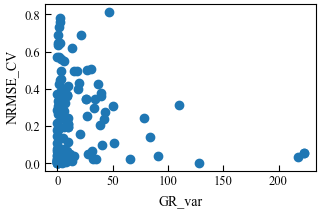

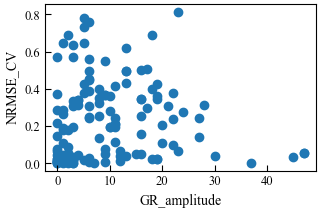

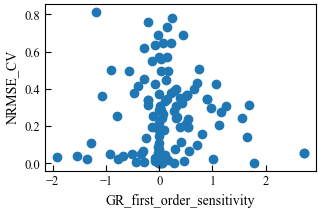

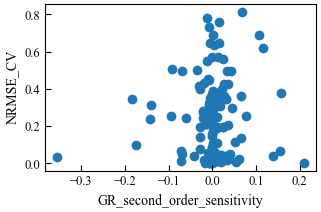

特征与 CV 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.1196       0.1623   -0.1076       0.2089
rCV_MAD                   -0.0162       0.8504    0.1708 *     0.0452
avg                        0.1302       0.1279    0.3693 ***   0.0000
median                     0.1322       0.1222    0.3803 ***   0.0000
std                        0.0409       0.6338    0.2897 ***   0.0006
var                       -0.0817       0.3408    0.2897 ***   0.0006
amplitude                  0.0560       0.5145    0.2866 ***   0.0007
first_order_sensitivity    0.0147       0.8640    0.1461       0.0873
second_order_sensitivity   0.0575       0.5031    0.0392       0.6480
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [16]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'CV'

for feature in feature_list:
    plot_scatter(GR_results[feature], NARMA10_results[target], f'GR_{feature}', f'NRMSE_{target}')

analyze_correlations(GR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：rCV_MAD

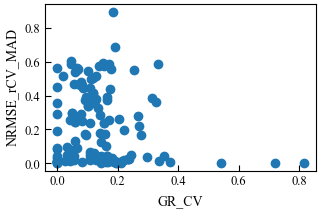

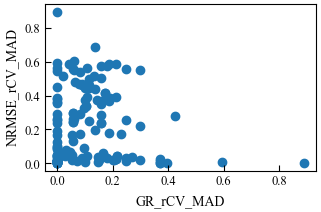

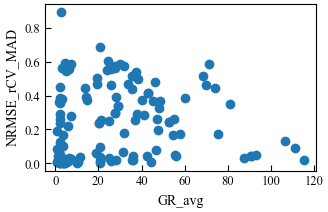

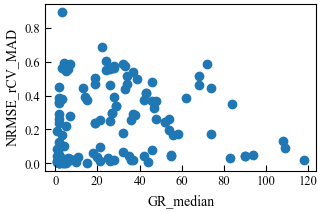

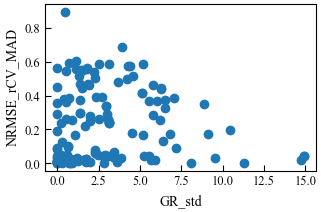

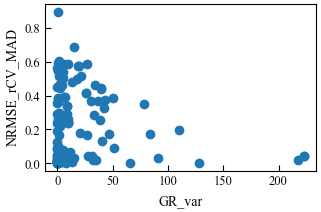

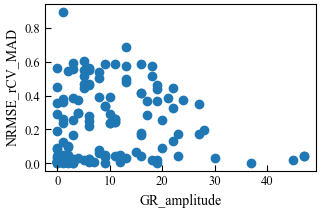

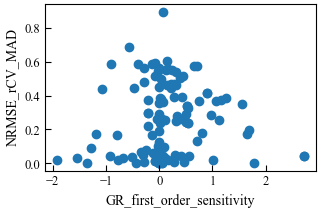

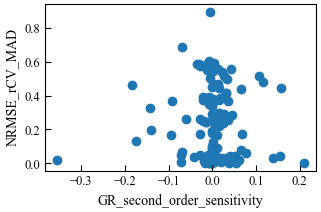

特征与 rCV_MAD 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                        -0.1398       0.1019   -0.1327       0.1208
rCV_MAD                   -0.0520       0.5445    0.1144       0.1816
avg                        0.1179       0.1684    0.3357 ***   0.0001
median                     0.1233       0.1496    0.3491 ***   0.0000
std                        0.0239       0.7805    0.2491 **    0.0032
var                       -0.0979       0.2534    0.2490 **    0.0032
amplitude                  0.0387       0.6521    0.2491 **    0.0032
first_order_sensitivity    0.0830       0.3333    0.1907 *     0.0251
second_order_sensitivity  -0.0238       0.7817   -0.0624       0.4674
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [17]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'rCV_MAD'

for feature in feature_list:
    plot_scatter(GR_results[feature], NARMA10_results[target], f'GR_{feature}', f'NRMSE_{target}')

analyze_correlations(GR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：std

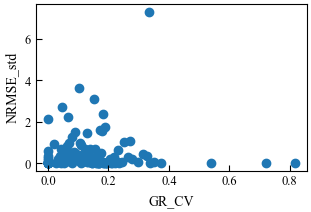

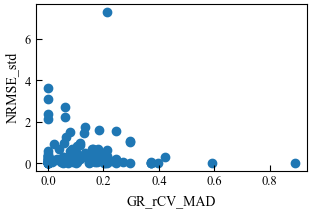

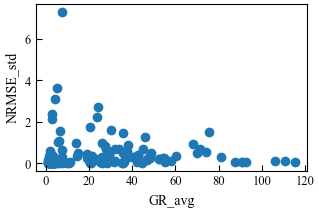

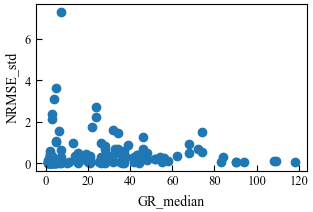

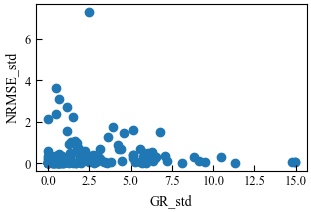

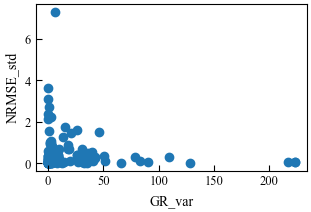

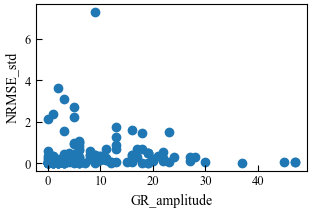

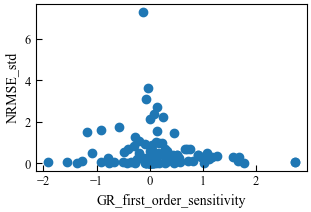

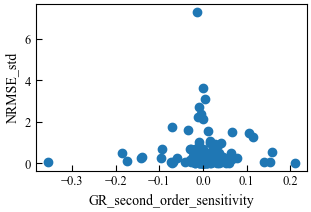

特征与 std 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.0312       0.7167   -0.1001       0.2429
rCV_MAD                   -0.0127       0.8827    0.1466       0.0863
avg                       -0.0520       0.5449    0.3428 ***   0.0000
median                    -0.0505       0.5561    0.3539 ***   0.0000
std                       -0.0561       0.5135    0.2634 **    0.0018
var                       -0.0937       0.2744    0.2633 **    0.0018
amplitude                 -0.0421       0.6237    0.2614 **    0.0020
first_order_sensitivity   -0.0786       0.3594    0.1104       0.1972
second_order_sensitivity   0.0110       0.8983    0.0218       0.8000
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [18]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'std'

for feature in feature_list:
    plot_scatter(GR_results[feature], NARMA10_results[target], f'GR_{feature}', f'NRMSE_{target}')

analyze_correlations(GR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)

#### 任务表现指标：avg

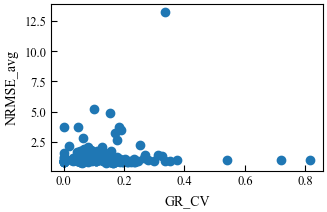

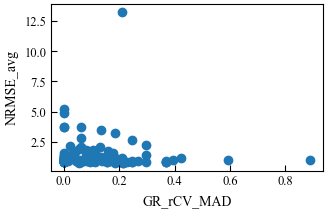

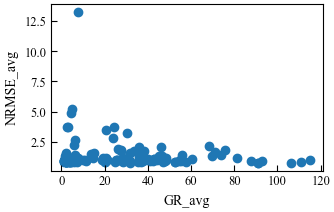

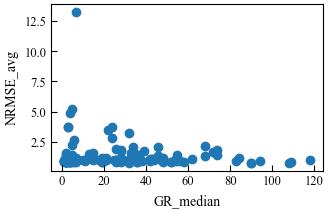

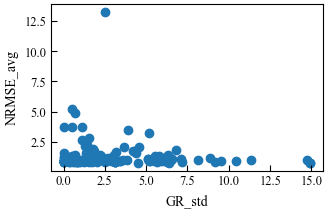

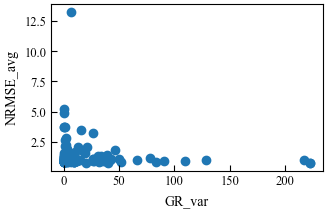

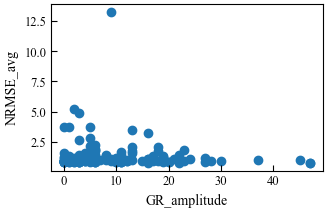

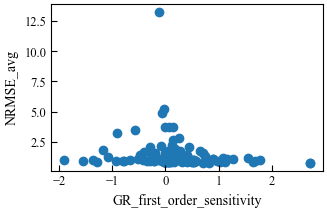

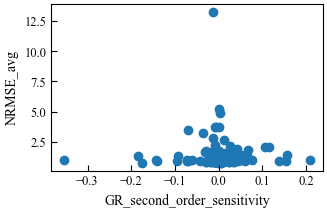

特征与 avg 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
CV                         0.0817       0.3408   -0.0417       0.6273
rCV_MAD                    0.0004       0.9961    0.0122       0.8874
avg                       -0.0916       0.2852    0.1062       0.2153
median                    -0.0903       0.2922    0.1061       0.2157
std                       -0.0738       0.3894    0.0659       0.4424
var                       -0.0948       0.2689    0.0656       0.4443
amplitude                 -0.0617       0.4721    0.0708       0.4095
first_order_sensitivity   -0.1089       0.2037   -0.1473       0.0847
second_order_sensitivity  -0.0038       0.9650    0.1074       0.2098
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



In [19]:
feature_list = ['CV', 'rCV_MAD', 'avg', 'median', 'std', 'var', 'amplitude','first_order_sensitivity','second_order_sensitivity']
target = 'avg'

for feature in feature_list:
    plot_scatter(GR_results[feature], NARMA10_results[target], f'GR_{feature}', f'NRMSE_{target}')

analyze_correlations(GR_results, NARMA10_results, target_metric=target, features=feature_list, plot=False)